Tensorflow constant

In [1]:
import tensorflow as tf

a = tf.constant(1)
b = tf.constant(2)
sum = a+b
sess = tf.Session()
print(sess.run(sum))

/home/pranav/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


3


Tensorflow placeholder

In [2]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
sum = a+b
sess = tf.Session()
print(sess.run(sum,{a:[1,2],b:[3,4]}))

[4. 6.]


Tensorflow variable

In [3]:
#model parameters
W = tf.Variable([-1.0],tf.float32)
b = tf.Variable([1.0],tf.float32)
#i/p o/p
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
linear_model = W * x + b
delta_square = tf.square(y-linear_model)
loss = tf.reduce_sum(delta_square)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(loss,{x:[1,2,3,4],y:[0,-1,-2,-3]}))

0.0


Simple Linear Regression in Tensorflow

In [4]:
#model parameters
W = tf.Variable([-1.0],tf.float32)
b = tf.Variable([1.0],tf.float32)
#i/p o/p
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
linear_model = W * x + b
#loss
delta_square = tf.square(y-linear_model)
loss = tf.reduce_sum(delta_square)
#optimize
optimizer = tf.train.GradientDescentOptimizer(0.01)
train =optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(1000):
    sess.run(train,{x:[1,2,3,4],y:[0,-1,-2,-3]})
print(sess.run([W,b]))

[array([-1.], dtype=float32), array([1.], dtype=float32)]


Neural Network using Tensorflow

In [6]:
#define the important parameters and variable to work with the tensors
learning_rate = 0.3
training_epochs = 1001
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]
print('n_dim: ',n_dim)
n_class = 2
model_path = '/home/pranav/Downloads/my python projects/tensor_model/new'

n_dim:  60


In [7]:
#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32,[None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_= tf.placeholder(tf.float32,[None,n_class])

In [8]:
#Define the model
def multilayer_perceptron(x, weights, biases):
    #Hidden layer with sigmoid activation
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    #Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #output layer with linear activation
    out_layer = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    return out_layer

#define weights and biases for each layer

weights = {
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class])),    
}

biases = {
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class])),    
}

In [9]:
#initialize all the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver() #save  model

#call your model defined
y = multilayer_perceptron(x,weights,biases)

#define cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_))

training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

#calculate cost and accuracy for wach epoch
mse_history = []
accuracy_history=[]

In [10]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_:train_y})
    cost_history = np.append(cost_history,cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    pred_y = sess.run(y, feed_dict = {x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_= sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy,feed_dict={x:train_x, y_:train_y}))
    accuracy_history.append(accuracy)
    if (epoch%50 == 0):
        print('epoch : ', epoch, 'cost : ', cost, '-MSE : ', mse_, 'Train Accuracy : ', accuracy)

epoch :  0 cost :  116.978386 -MSE :  12117.004118433597 Train Accuracy :  0.45454547
epoch :  50 cost :  0.66083235 -MSE :  1.9164079279627697 Train Accuracy :  0.6
epoch :  100 cost :  0.6320531 -MSE :  2.0587736754332537 Train Accuracy :  0.6363636
epoch :  150 cost :  0.5931043 -MSE :  2.008854187123027 Train Accuracy :  0.6727273
epoch :  200 cost :  0.65081275 -MSE :  2.1994878945624143 Train Accuracy :  0.54545456
epoch :  250 cost :  0.6274475 -MSE :  1.3187252467676616 Train Accuracy :  0.7090909
epoch :  300 cost :  0.550956 -MSE :  1.4067529800229277 Train Accuracy :  0.73333335
epoch :  350 cost :  0.4566906 -MSE :  1.6570774601065934 Train Accuracy :  0.75151515
epoch :  400 cost :  0.47838566 -MSE :  2.3079953164481526 Train Accuracy :  0.76363635
epoch :  450 cost :  0.4535384 -MSE :  3.150751926096846 Train Accuracy :  0.77575755
epoch :  500 cost :  0.36526215 -MSE :  2.6501962175662563 Train Accuracy :  0.8181818
epoch :  550 cost :  0.28060898 -MSE :  2.6039924004916

In [11]:
save_path = saver.save(sess, model_path)
print('Model saved in file: %s' % save_path)

Model saved in file: /home/pranav/Downloads/my python projects/tensor_model/new


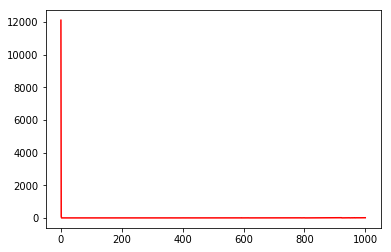

In [12]:
# plot mse and accuracy graph
plt.plot(mse_history, 'r')
plt.show()

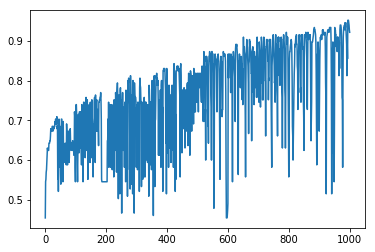

In [13]:
plt.plot(accuracy_history)
plt.show()

In [14]:
#print final accuracy
correction_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: ', (sess.run(accuracy,feed_dict={x:train_x, y_:train_y})))

Test accuracy:  0.92121214


In [15]:
#print final mean square errror
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print('MSE : %.4f' % sess.run(mse))

MSE : 11.6522


trying to reuse the model

In [16]:
model_path = '/home/pranav/Downloads/my python projects/tensor_model/new'
saver = tf.train.Saver()
saver.restore(sess,model_path)
prediction = tf.argmax(y,1)
correct_prediction = tf.equal(prediction, tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(93,101):
    prediction_run = sess.run(prediction, feed_dict={x: X[i].reshape(1,60)})

INFO:tensorflow:Restoring parameters from /home/pranav/Downloads/my python projects/tensor_model/new
